## Zygote self-autodifferentiability

In [17]:
using Zygote

In [18]:
function fj(x, bias)
    jacc = Zygote.jacobian(x->x.^2, x)
    jac = jacc[1]
    # @info jacc
    @info "jac" jac
    return jac * x .+ bias
end

fj (generic function with 1 method)

In [19]:
function fg(x, bias)
    grad = Zygote.gradient(x->sum(x.^2), x)[1]
    @info "grad" grad
    return grad .* x .+ bias
end

fg (generic function with 1 method)

In [20]:
x = [1., 2., 3.]
b = [0., 0., 0.]

3-element Vector{Float64}:
 0.0
 0.0
 0.0

In [21]:
function altjacobian(f, arg, outdim)
   (reduce(vcat, map(outidx -> gradient(x -> f(x)[outidx], arg)[1]', range(1, outdim))), ) 
end

altjacobian (generic function with 1 method)

In [22]:
function f(x)
    @info "f run"
    [x[1]^2, x[2] + x[3]]
end

f (generic function with 1 method)

In [23]:
f([2,3,4])

┌ Info: f run
└ @ Main c:\Users\Andrei\LaplaceRedux.jl\src\Trials-01.ipynb:2


2-element Vector{Int64}:
 4
 7

In [24]:
jacobian(f, [2.,3.,4.])

┌ Info: f run
└ @ Main c:\Users\Andrei\LaplaceRedux.jl\src\Trials-01.ipynb:2


([4.0 0.0 0.0; 0.0 1.0 1.0],)

In [25]:
altjacobian(f, [2.,3.,4.], 2)

┌ Info: f run
└ @ Main c:\Users\Andrei\LaplaceRedux.jl\src\Trials-01.ipynb:2
┌ Info: f run
└ @ Main c:\Users\Andrei\LaplaceRedux.jl\src\Trials-01.ipynb:2


([4.0 0.0 0.0; 0.0 1.0 1.0],)

In [26]:
g = gradient(x -> f(x)[1], [2,3,4])[1]

┌ Info: f run
└ @ Main c:\Users\Andrei\LaplaceRedux.jl\src\Trials-01.ipynb:2


3-element Vector{Float64}:
 4.0
 0.0
 0.0

In [27]:
arg = [2,3,4]


3-element Vector{Int64}:
 2
 3
 4

In [28]:
xx = reduce(hcat, [[1, 2], [3, 4]])

2×2 Matrix{Int64}:
 1  3
 2  4

In [29]:
jacobian(x -> xx, 0)[1]

4-element Vector{Int64}:
 0
 0
 0
 0

In [30]:
fj(x, b)

┌ Info: jac
│   jac = [2.0 0.0 0.0; 0.0 4.0 0.0; 0.0 0.0 6.0]
└ @ Main c:\Users\Andrei\LaplaceRedux.jl\src\Trials-01.ipynb:5


3-element Vector{Float64}:
  2.0
  8.0
 18.0

In [31]:
fg(x, [0, 0, 0])

┌ Info: grad
│   grad = [2.0, 4.0, 6.0]
└ @ Main c:\Users\Andrei\LaplaceRedux.jl\src\Trials-01.ipynb:3


3-element Vector{Float64}:
  2.0
  8.0
 18.0

In [32]:
Zygote.gradient(b -> sum(fj(x,b)), rand(3))

┌ Info: jac
│   jac = [2.0 0.0 0.0; 0.0 4.0 0.0; 0.0 0.0 6.0]
└ @ Main c:\Users\Andrei\LaplaceRedux.jl\src\Trials-01.ipynb:5


ErrorException: Mutating arrays is not supported -- called copyto!(SubArray{Float64, 1, Matrix{Float64}, Tuple{Int64, Base.Slice{Base.OneTo{Int64}}}, true}, ...)
This error occurs when you ask Zygote to differentiate operations that change
the elements of arrays in place (e.g. setting values with x .= ...)

Possible fixes:
- avoid mutating operations (preferred)
- or read the documentation and solutions for this error
  https://fluxml.ai/Zygote.jl/latest/limitations


In [33]:
Zygote.gradient(b -> sum(fg(x,b)), rand(3))

┌ Info: grad
│   grad = [2.0, 4.0, 6.0]
└ @ Main c:\Users\Andrei\LaplaceRedux.jl\src\Trials-01.ipynb:3


(Fill(1.0, 3),)

In [34]:
Zygote.gradient(x -> sum(fg(x,b)), rand(3))

┌ Info: grad
│   grad = [0.9346993212354424, 0.4228318424411146, 0.5209914507987301]
└ @ Main c:\Users\Andrei\LaplaceRedux.jl\src\Trials-01.ipynb:3


([1.8693986424708848, 0.8456636848822292, 1.0419829015974602],)

In [35]:
Zygote.gradient(x -> sum(fj(x,b)), rand(3))

┌ Info: jac
│   jac = [0.03650695240301571 0.0 0.0; 0.0 1.5221896070818655 0.0; 0.0 0.0 0.5211465447842307]
└ @ Main c:\Users\Andrei\LaplaceRedux.jl\src\Trials-01.ipynb:5


ErrorException: Mutating arrays is not supported -- called copyto!(SubArray{Float64, 1, Matrix{Float64}, Tuple{Int64, Base.Slice{Base.OneTo{Int64}}}, true}, ...)
This error occurs when you ask Zygote to differentiate operations that change
the elements of arrays in place (e.g. setting values with x .= ...)

Possible fixes:
- avoid mutating operations (preferred)
- or read the documentation and solutions for this error
  https://fluxml.ai/Zygote.jl/latest/limitations


## Zygote diff-ability wrt array elements

In [36]:
x = [1 2 3; 4 5 6]; y = [2, 3]; z = [1, 10, 100];
# x .* y .* z'
ps = Params([x[2,3]])
g = gradient(ps) do
    sum(x .* y .* z')
end
x[2,3]

6

In [37]:
g[x]

KeyError: KeyError: key [1 2 3; 4 5 6] not found

In [38]:
g[x[2,3]]

ErrorException: Only reference types can be differentiated with `Params`.

## Testing DataLoader with existing code

In [39]:
using Pkg
Pkg.activate(".")
using LaplaceRedux
using LaplaceRedux.Curvature
using LaplaceRedux.Data
using Flux
using Flux.Optimise: update!, Adam
using Plots
using Statistics
using MLUtils
using Zygote

  Activating new project at `c:\Users\Andrei\LaplaceRedux.jl\src`

In [40]:
using Printf

In [41]:
# SETUP
n = 100
data_dict = Dict()

x, y = LaplaceRedux.Data.toy_data_regression(n)
xs = [[x] for x in x]
X, Y = reduce(hcat, x), reduce(hcat, y)

data = DataLoader((X, Y), batchsize=10)
data = (xs, y)
data_dict[:regression_batched] = Dict(
    :data => data,
    :X => X,
    :y => y,
    :outdim => 1,
    :loss_fun => :mse,
    :likelihood => :regression,
)

Dict{Symbol, Any} with 6 entries:
  :loss_fun   => :mse
  :y          => [0.722622, -0.758383, 0.730782, 1.3256, 0.0837503, -0.505126, …
  :likelihood => :regression
  :X          => [1.74112 4.29626 … 1.55054 7.87312]
  :outdim     => 1
  :data       => ([[1.74112], [4.29626], [7.69539], [7.46778], [3.34422], [5.90…

In [42]:
X

1×100 Matrix{Float64}:
 1.74112  4.29626  7.69539  7.46778  …  3.22491  3.10918  1.55054  7.87312

In [43]:
Y

1×100 Matrix{Float64}:
 0.722622  -0.758383  0.730782  1.3256  …  -0.495756  1.13933  0.866698

In [44]:
data

([[1.7411164129445034], [4.296263535084707], [7.69539170068533], [7.4677798550572065], [3.344218480965197], [5.901748033622354], [2.7960386763938354], [2.860563021416737], [1.1622059460263134], [1.6897493411617228]  …  [2.5009538695353744], [3.8441048862803573], [1.9188069275924775], [4.889614042890374], [6.448109489621749], [1.0059828060506577], [3.2249077951384777], [3.109181960444552], [1.5505394045256375], [7.873124542501601]], [0.7226216827483725, -0.7583831355920745, 0.7307818931777725, 1.3255976994207295, 0.08375028013574853, -0.5051258394174286, 0.9566672112009722, 0.5757375224041357, 1.5772502025128867, 1.1152484301874066  …  0.7263504609168682, -0.4484524267495201, 1.1869087922300476, -0.7078441189682598, 0.22851542241684314, 1.1772544333344583, 0.045863886181089844, -0.49575552771665043, 1.139331583799923, 0.8666975886493081])

In [45]:
reduce(hcat, y)

1×100 Matrix{Float64}:
 0.722622  -0.758383  0.730782  1.3256  …  -0.495756  1.13933  0.866698

In [46]:
for d in data
    x, y = d
    # # Assert on batching
    # @assert size(x)[end] == 10
    # @assert size(x)[end] == 10
    # @sho
    @show nn(x)
    @show size(nn(x))
    @show y
    @show size(y)
    break
end

UndefVarError: UndefVarError: `nn` not defined

In [47]:
# Here we have "zip" code copied from the laplace.jl tests

# Regression:
x, y = LaplaceRedux.Data.toy_data_regression(n)
xs = [[x] for x in x]
X = hcat(xs...)
Y = reduce(hcat, y)
data = zip(xs, y)
data_dict[:regression] = Dict(
    :data => data,
    :X => X,
    :y => y,
    :outdim => 1,
    :loss_fun => :mse,
    :likelihood => :regression,
)

val = data_dict[:regression]

# Unpack:
data = val[:data]
X = val[:X]
y = val[:y]
outdim = val[:outdim]
loss_fun = val[:loss_fun]
likelihood = val[:likelihood]

# Neural network:
n_hidden = 32
D = size(X, 1)
nn = Chain(Dense(D, n_hidden, σ), Dense(n_hidden, outdim))
λ = 0.01
sqnorm(x) = sum(abs2, x)
weight_regularization(λ=λ) = 1 / 2 * λ^2 * sum(sqnorm, Flux.params(nn))
# loss(x, y) = getfield(Flux.Losses, loss_fun)(nn(x), y) + weight_regularization()
# loss(x, y; kwargs...) = getfield(Flux.Losses, loss_fun)(nn(x), y; kwargs...) + weight_regularization()
# loss(x, y) = getfield(Flux.Losses, loss_fun)(nn(x), y, agg=sum) + weight_regularization()
loss(x, y) = Flux.Losses.mse(nn(x), y, agg=sum) + weight_regularization()

opt = Adam()
epochs = 200
avg_loss(data) = mean(map(d -> loss(d[1], d[2]), data))
show_every = epochs / 10

for epoch in 1:epochs
    for d in data
        gs = gradient(Flux.params(nn)) do
            l = loss(d...)
        end
        update!(opt, Flux.params(nn), gs)
    end
    if epoch % show_every == 0
        println("Epoch " * string(epoch))
        @show avg_loss(data)
    end
end


┌ Warning: Layer with Float32 parameters got Float64 input.
│   The input will be converted, but any earlier layers may be very slow.
│   layer = Dense(1 => 32, σ)
│   summary(x) = 1-element Vector{Float64}
└ @ Flux C:\Users\Andrei\.julia\packages\Flux\EHgZm\src\layers\stateless.jl:60


Epoch 20
avg_loss(data) = 0.49492753972012826


Epoch 40
avg_loss(data) = 0.4682195818079879


Epoch 60
avg_loss(data) = 0.4536057449373088


Epoch 80
avg_loss(data) = 0.4417601746857045


Epoch 100
avg_loss(data) = 0.43057352768417184


Epoch 120
avg_loss(data) = 0.4192382272259807


Epoch 140
avg_loss(data) = 0.40735330298809885


Epoch 160
avg_loss(data) = 0.3947255817178441


Epoch 180
avg_loss(data) = 0.38121960890492096


Epoch 200
avg_loss(data) = 0.3667108473136689


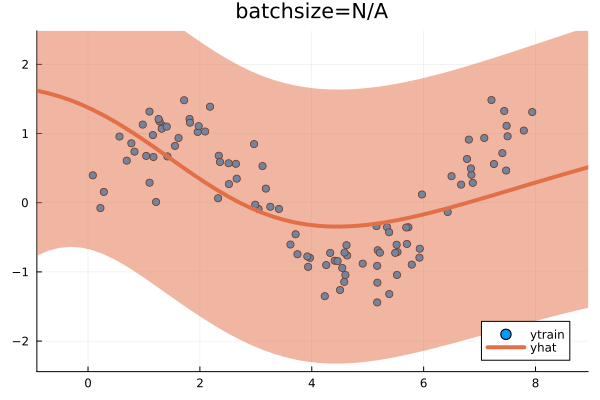

In [48]:
data = val[:data]
# Fit unbatched LA
if outdim == 1
    la = Laplace(nn; likelihood=likelihood, λ=λ, subset_of_weights=:last_layer)
    fit!(la, data)
    # optimize_prior!(la; verbosity=1)
    plot(la, X, y, title="batchsize=N/A")                              # standard
    # savefig(@sprintf("fig-01-%02d.png", 0))
    # plot(la, X, y; xlims=(-5, 5), ylims=(-5, 5))  # lims
    # plot(la, X, y; link_approx=:plugin)         # plugin approximation
end

In [49]:
size(X)

(1, 100)

In [50]:
loss(x, y) = Flux.Losses.mse(nn(x), y, agg=sum) + weight_regularization()

loss (generic function with 1 method)

In [51]:
# The loss function should be summative
# The loss of the batch is the sum of losses of its part
x_1 = [1.5261694931931657]
y_1 = [1.5517179074064962]
x_2 = [5.795661372040879]
y_2 = [-0.6585143352250986]
x_b = hcat(x_1, x_2)
y_b = hcat(y_1, y_2)
@show loss(x_1, y_1)
@show loss(x_2, y_2)
@show loss(x_1, y_1) + loss(x_2, y_2)
@show loss(x_b, y_b)

loss(x_1, y_1) = 0.8933631622263988
loss(x_2, y_2) = 0.20500667179719492
loss(x_1, y_1) + loss(x_2, y_2) = 1.0983698340235937
loss(x_b, y_b) = 1.096862820730877


1.096862820730877

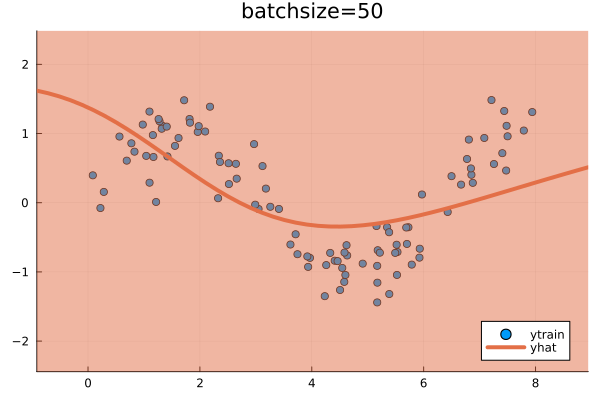

In [52]:
# Now batch the same data, repeat the procedure

# X = reduce(hcat, x)
Y = reduce(hcat, y)

b = 50
data = DataLoader((X, Y), batchsize=b)
# Fit LA
if outdim == 1
    la = Laplace(nn; likelihood=likelihood, λ=λ, subset_of_weights=:last_layer)
    fit!(la, data)
    # optimize_prior!(la; verbosity=0)
    plot(la, X, y, title="batchsize=$b")                              # standard
    # savefig(@sprintf("fig-%02d.png", batchsize))
    # plot(la, X, y; xlims=(-5, 5), ylims=(-5, 5))  # lims
    # plot(la, X, y; link_approx=:plugin)         # plugin approximation
end

In [53]:
g_1 = Float32[-0.52817833, -0.43119496, -0.5210522, -0.4708877, -0.45764622, -0.42256445, -0.45563537, -0.43949524, -0.53112304, -0.43344456, -0.4039374, -0.43194032, -0.43552247, -0.4571392, -0.43146086, -0.4209185, -0.36306658, -0.42193952, -0.49689957, -0.47045025, -0.40221792, -0.44249928, -0.38054764, -0.43663415, -0.4390404, -0.56177676, -0.46146542, -0.45663112, -0.45890695, -0.4663252, -0.47067362, -0.423838, -0.9058165]
g_2 = Float32[-0.9911245, -1.1539569, -1.5278772, -1.0762932, -1.044652, -0.78305584, -1.0403739, -1.1732417, -0.99707854, -1.1594931, -1.0878786, -1.1557361, -1.1641731, -1.0437337, -1.1544219, -1.3352259, -0.67081517, -1.1303514, -0.92817104, -1.0751797, -0.7444584, -1.1791624, -0.7035855, -1.1667923, -1.0006479, -1.6040461, -1.4135218, -1.0427268, -1.4095868, -1.4210858, -1.0753393, -1.1354641, -2.2405646]
g_batch = Float32[-1.5193033, -1.5851523, -2.04893, -1.5471814, -1.5022987, -1.2056206, -1.4960097, -1.6127374, -1.528202, -1.5929381, -1.4918164, -1.5876769, -1.599696, -1.5008733, -1.5858833, -1.7561449, -1.033882, -1.5522914, -1.425071, -1.5456303, -1.1466767, -1.6216621, -1.0841335, -1.6034269, -1.4396887, -2.1658235, -1.8749877, -1.4993583, -1.8684943, -1.8874115, -1.5460135, -1.5593024, -3.1463819]

33-element Vector{Float32}:
 -1.5193033
 -1.5851523
 -2.04893
 -1.5471814
 -1.5022987
 -1.2056206
 -1.4960097
 -1.6127374
 -1.528202
 -1.5929381
  ⋮
 -1.4396887
 -2.1658235
 -1.8749877
 -1.4993583
 -1.8684943
 -1.8874115
 -1.5460135
 -1.5593024
 -3.1463819

In [54]:
g_1 * g_2'

33×33 Matrix{Float32}:
 0.52349   0.609495  0.806992  0.568475  …  0.567971  0.599728  1.18342
 0.427368  0.49758   0.658813  0.464092     0.463681  0.489606  0.96612
 0.516428  0.601272  0.796104  0.560805     0.560308  0.591636  1.16745
 0.466708  0.543384  0.719459  0.506813     0.506364  0.534676  1.05505
 0.453584  0.528104  0.699227  0.492562     0.492125  0.519641  1.02539
 0.418814  0.487621  0.645627  0.454803  …  0.4544    0.479807  0.946783
 0.451591  0.525784  0.696155  0.490397     0.489963  0.517358  1.02088
 0.435594  0.507159  0.671495  0.473026     0.472607  0.499031  0.984717
 0.526409  0.612893  0.811491  0.571644     0.571137  0.603071  1.19002
 0.429598  0.500176  0.66225   0.466513     0.4661    0.492161  0.971161
 ⋮                                       ⋱  ⋮                   
 0.435144  0.506634  0.6708    0.472536     0.472117  0.498515  0.983698
 0.556791  0.648266  0.858326  0.604637  …  0.604101  0.637877  1.2587
 0.45737   0.532511  0.705063  0.496672     0

In [55]:
(g_2 * g_1')'

33×33 adjoint(::Matrix{Float32}) with eltype Float32:
 0.52349   0.609495  0.806992  0.568475  …  0.567971  0.599728  1.18342
 0.427368  0.49758   0.658813  0.464092     0.463681  0.489606  0.96612
 0.516428  0.601272  0.796104  0.560805     0.560308  0.591636  1.16745
 0.466708  0.543384  0.719459  0.506813     0.506364  0.534676  1.05505
 0.453584  0.528104  0.699227  0.492562     0.492125  0.519641  1.02539
 0.418814  0.487621  0.645627  0.454803  …  0.4544    0.479807  0.946783
 0.451591  0.525784  0.696155  0.490397     0.489963  0.517358  1.02088
 0.435594  0.507159  0.671495  0.473026     0.472607  0.499031  0.984717
 0.526409  0.612893  0.811491  0.571644     0.571137  0.603071  1.19002
 0.429598  0.500176  0.66225   0.466513     0.4661    0.492161  0.971161
 ⋮                                       ⋱  ⋮                   
 0.435144  0.506634  0.6708    0.472536     0.472117  0.498515  0.983698
 0.556791  0.648266  0.858326  0.604637  …  0.604101  0.637877  1.2587
 0.45737   0.5

In [56]:
isapprox(g_1 + g_2, g_batch, atol=.00005)

true

In [57]:
for d in data
    x, y = d
    @show x
    @show [x[1]]
    @show y
    break
end

x = [7.212605629276906 6.853912082857671 4.601130023210951 2.1806688476971674 6.669400697641634 5.157028710334818 5.172855548981173 1.3329458804729537 3.9671634662823694 1.5551897617974344 5.930533829169931 1.2787074857224807 3.7111836829314475 0.08564229487475927 7.256823917710805 4.544970748055114 5.969795314393457 0.2824920694495372 6.42941587232502 5.727867582770104 0.22203730436457558 0.6923937516033369 5.787518661156716 7.4406430312479195 5.1792390978330936 1.1595449868312775 7.790517000026403 1.8153854770185385 1.2619446754984498 2.6435826741056108 5.385772418723861 1.1696351448627897 5.169642937550592 1.1000585594132755 7.084436796828909 6.808099519992362 7.9414796419876295 4.258613986000669 1.6181416400763338 3.048390976306112 2.337886435166822 5.16984990208392 6.498414718094443 5.6890566494685375 0.5622542401599366 1.961608086444543 5.92489281298111 7.482811262379361 3.744496061593537 7.474890513043864]
[x[1]] = [7.212605629276906]
y = [1.4837193767803216 0.40374470921946465 

In [58]:
# Plotting confidence range progression for increasing batchsizes
# Save to a series of PNG images, which can be merged to a gif via imagemagick
for batchsize in range(1, 1)
    # Now batch the same data, repeat the procedure
    Y = reduce(hcat, y)
    data = DataLoader((X, Y), batchsize=batchsize)
    # Fit LA
    if outdim == 1
        la = Laplace(nn; likelihood=likelihood, λ=λ, subset_of_weights=:last_layer)
        fit!(la, data)
        # optimize_prior!(la; verbosity=1, show_every=10_000)
        plot(la, X, y, title="batchsize=$batchsize")                              # standard
        savefig(@sprintf("fig-01-%02d.png", batchsize))
        # plot(la, X, y; xlims=(-5, 5), ylims=(-5, 5))  # lims
        # plot(la, X, y; link_approx=:plugin)         # plugin approximation
    end
end

DimensionMismatch: DimensionMismatch: All data containers must have the same number of observations.

In [59]:

    # lossf = la.est_params.curvature.loss_fun
    # x_1 = [1.5261694931931657]
    # y_1 = [1.5517179074064962]
    # x_2 = [5.795661372040879]
    # y_2 = [-0.6585143352250986]
    # x_b = hcat(x_1, x_2)
    # y_b = hcat(y_1, y_2)
    # @show lossf(x_1, y_1)
    # @show lossf(x_2, y_2)
    # @show lossf(x_1, y_1) + lossf(x_2, y_2)
    # @show lossf(x_b, y_b)
    # @assert isapprox(lossf(x_1, y_1) + lossf(x_2, y_2), lossf(x_b, y_b), atol=.05)
        # x, y = d
        # if length(size(x)) == 2 && size(x, 2) == 2
        #     # @show x
        #     # @show y
        #     # @show [x[1]]
        #     # @show [y[1]]
        #     loss_1, H_1 = hessian_approximation(la, ([x[1]], [y[1]]))
        #     loss_2, H_2 = hessian_approximation(la, ([x[2]], [y[2]]))
        #     @assert isapprox(loss_1 + loss_2, loss_batch, atol=.05) "$loss_1 + $loss_2 == $(loss_1 + loss_2) != $loss_batch"
        #     @assert isapprox(H_1 + H_2, H_batch, atol=.05) # || isapprox(.5H_1 + .5H_2, H_batch, atol=3)
        # end
        # @show H_1
        # @show H_2
        # @show H_batch
        # @assert isapprox(.5H_1 + .5H_2, H_batch, atol=3) || isapprox(H_1 + H_2, H_batch, atol=3)

In [60]:
fieldnames(DataLoader)

(:data, :batchsize, :buffer, :partial, :shuffle, :parallel, :collate, :rng)